# Explore fault data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import cv2
import os
import segyio

# Visualize 3d origin labeled data

In [ ]:
root_path = "/home/zhangzr/FaultRecongnition/Fault_data/real_labeled_data"
ori_seis = segyio.tools.cube(os.path.join(root_path, 'mig_fill.sgy'))
ori_label = segyio.tools.cube(os.path.join(root_path, 'label_fill.sgy'))

In [ ]:
slice_id = 500
plt.subplot(2,1,1)
fig = plt.imshow(ori_seis[:,:,slice_id], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(2,1,2)
fig = plt.imshow(ori_label[:,:,slice_id], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()

# Visualize 3d real labeled crop data

In [45]:
root_path = '/home/zhangzr/FaultRecongnition/Fault_data/public_data'
scr_root_path = os.path.join(root_path, 'crop')
data_split = 'train'
data_lst = os.listdir(os.path.join(scr_root_path, data_split))
index = 101
with h5py.File(os.path.join(scr_root_path, data_split, data_lst[index]), 'r') as f:
    seis = f['raw'][:]
    label = f['label'][:]

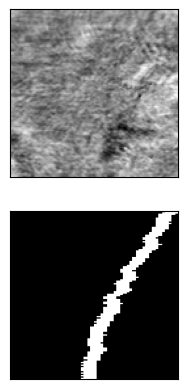

In [46]:
slice_id = 64
plt.subplot(2,1,1)
fig = plt.imshow(seis[:,:,slice_id], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(2,1,2)
fig = plt.imshow(1-label[:,:,slice_id], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()

# Visualize simulate data

In [ ]:
root_dir = '/home/zhangzr/FaultRecongnition/Fault_data/simulate_data'
name = '60.dat'
split = 'train'
seis = np.fromfile(os.path.join(root_dir, split, 'seis', name), dtype=np.single)
label = np.fromfile(os.path.join(root_dir, split, 'fault', name), dtype=np.single)
# reshape into 128 * 128 * 128
seis = seis.reshape((128, 128, 128))
label = label.reshape((128, 128, 128))

In [ ]:
slice_id = 15
plt.subplot(2,1,1)
fig = plt.imshow(seis[:,:,slice_id], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(2,1,2)
fig = plt.imshow(label[:,:,slice_id], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()

# Visulize 2D Crop Data

In [ ]:
root_dir = '/home/zhangzr/FaultRecongnition/Fault_data/2Dfault/converted'
split = 'train'
data_lst = os.listdir(os.path.join(root_dir, split, 'image'))

In [ ]:
idx = 5
image_name = data_lst[idx]
image = cv2.imread(os.path.join(root_dir, split,'image', image_name), cv2.IMREAD_UNCHANGED)
label = cv2.imread(os.path.join(root_dir,  split,'ann', image_name), cv2.IMREAD_UNCHANGED)

In [ ]:
plt.subplot(2,1,1)
fig = plt.imshow(image, cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(2,1,2)
fig = plt.imshow(1-label, cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()